## Markov Chains

$t=1,...,T$에서 아래의 conditional independence를 

$$
p(\theta^{(t+1)}|\theta^{(t)},...,\theta^{(1)})=p(\theta^{(t+1)}|\theta^{(t)}).
$$

만족하는 일련의 랜덤변수 $\theta^{(1)},...,\theta^{(T)}$는 first-order Markov chain이다.

우리는 위 Markov chain을 특정짓기 위해 두가지를 정의해야 한다.

1. defining the initial distribution $p(\theta^{(0)})$,
2. defining the transition probabilities $p_t(\theta^{(t+1)}|\theta^{(t)})$ for all $t$.

Markov chain은 임의의 initial state에서 시작해서, 다음 state로, transition probability에 의해 움직인다.

이러한 Markov chain은 memoryless라고도 불리는데, 위의 조건처럼 다음 state가 바로 이전 state에만 영향을 받는 성질을 말한다.

만약 Markov chain에서의 transition probability가 항상 같으면, homogeneous 혹은 time invariant라고도 불리는데, ***모든 $t$에 대해서 transition probabilities가 항상 같다***. 이러한 homogeneous한 성질은 chain이 $t\rightarrow\infty$로 진행되면 될수록, stationary distribution이라고 불리는 equilibrium에 도달하는 성질이다. 

$$p(\theta^{(t+1)}|\theta^{(t)})=p(\theta^{(t)}|\theta^{(t-1)})$$

그리고 만약 transition probabilities가 distribution을 변화시키기 않는다면, 이러한 Markov chain의 distribution을 invariant하다고 말한다.

homogeneous Markov chain에서, a distribution $p^*(\theta)$는 아래 조건을 만족할 때, invariant하다.

$$p^*(\theta^\prime)=\sum_{\theta} {p(\theta^\prime|\theta)p^*(\theta)}$$

<!-- 위 식의 의미를 풀어보면, 현재 state에 대한 target distribution에 대한 trainsition probability의 기댓값이 다음 state에 대한 target distribution에 대한 기댓값과 같다는 의미이다. -->

MCMC에서, 우리가 원하는 것은 Markov chain이 invariant한 어떤 특정한 distribution을 가지도록 하는 것이다. 이러한 distribution은 우리가 Monte Carlo estimation을 통해 얻을 추정값을 위해 사용되는 샘플을 얻기 위한 posterior distribution이다.

이러한 ***invariant한 특정한 distribution을 얻는 한가지 확실한 방법***은, transition probability를 다음과 같은 방법을 통해서 ***detailed balance condition***을 만족시켜 주면 된다. 

$$
p(\theta^\prime|\theta)p^*(\theta)=p(\theta|\theta^\prime)p^*(\theta^\prime).
$$

여기서 detailed balance condition이 의미하는 것은 두 상태 $\theta$ and $\theta^\prime$ 사이에 존재하는 흐름의 비율이 항상 두 방향 모두 같게( $\theta\rightarrow\theta^\prime\:\text{and}\:\theta^\prime\rightarrow\theta$ ) 만들어 줌을 의미한다. 이러한 detailed balance조건을 만족하는 Markov chain을 ***reversible***이라고 부른다. 이것이 $p^*(\theta)$가 Markov chain의 invariant distribution으로써 가질 수 있는 충분조건임을 다음과 같이 쉽게 보일 수 있다.

$$
\sum_\theta p(\theta^\prime|\theta)p^*(\theta)=\sum_\theta p(\theta|\theta^\prime)p^*(\theta^\prime)=p^*(\theta^\prime)\sum_\theta p(\theta|\theta^\prime)=p^*(\theta^\prime).
$$

또 다른 중요한 성질은 ***ergodicity*** 이다. Markov chain은 ergodic하다고 불리는데, 만약 invariant distribution이 초기 분포(initial distribution) $p(\theta^{(0)})$이 무엇이냐에 상관 없이 $t\rightarrow\infty$일때, 수렴한다는 것을 의미한다. ergodic Markov chain은 오직 하나의 invariant distribution을 가지고, 이를 equilibrium distribution 이라고 부른다. homogeneous Markov chain은 invariant distribution과 transition probabilities에 대해 약간의 제약을 줌으로써 ergodic하다.

구체적으로, MCMC algorithm으로 생성된 샘플의 경우 모든 state(except the initial state)에서 이전 state에 의존적이기 때문에 독립이 아니다. 그런데 여기서, 높은 상관관계를 가지는 샘플은 MCMC 추정의 분산을 키우기 때문에, 좋은 MCMC sampler는 낮은 상관관계를 가지는 샘플을 생성할 수 있어야한다. 이러한 상관관계를 측정할 수 있는 방법중 하나로 auto-correlation function(ACF)라는 것을 사용한다.

$$
\rho_t={{1\over{S-t}} \Sigma^{S-t}_{s=1}(f_s-\bar{f})(f_{s+t}-\bar{f})\over{{1\over{S-1}}\Sigma^S_{s=1}(f_s-\bar{f})^2}}
$$

여기서, $\bar{f}={1\over{S}}\Sigma^S_{s=1}f_s$그리고 $t$는 time lag이다. 더 낮은 ACF값은 더 샘플러가 독립적이라는 의미이다. 또한 MCMC 방법을 통한 샘플들은 이전 state에 대해서 더 독립적일 때, 우리는 이러한 MCMC algorithm을 ***mixes better or has better mixing rate***라고 말한다.

## Markov chain example

가장 간단한 예시로, 날씨 예시를 들어보자.

만약 transition probability를 만족하는 matrix $P$가 있다고 할때,

$$p_{ij}=p(X^{(t+1)}=j|x^{(t)}=i)$$

라고 하자. 이 의미는 현재 $i$번째 state에 있을 때, $j$번째 state로 움직일 probability를 의미한다.

만약에 오늘 날씨가 맑다면,
- 다음주에 맑을 확률은
    - $p(X^{(다음주)}=\text{맑음}|X^{(오늘)}=\text{맑음})=0.7$
- 다음주에 비가올 확률은
    - $p(X^{(다음주)}=\text{비}|X^{(오늘)}=\text{맑음})=0.3$

만약에 오늘 날씨가 비가 온다면,
- 다음주에 맑을 확률은
    - $p(X^{(다음주)}=\text{맑음}|X^{(오늘)}=\text{비})=0.2$
- 다음주에 비가올 확률은
    - $p(X^{(다음주)}=\text{비}|X^{(오늘)}=\text{비})=0.8$
    
$$P=\begin{bmatrix} 0.7 & 0.3 \\ 0.2 & 0.8 \end{bmatrix}$$


In [35]:
import numpy as np

P = np.array([[0.7, 0.3],[0.2,0.8]])
print(P)

weeks = 50

# Initial state는 해가 뜬 날이다.
x_0 = [1, 0];
x_t = [[] for _ in range(weeks+1)]

x_t[0] = x_0
for i,week in enumerate(range(weeks)):
    x_t[i+1] = list(x_t[i] @ P)
    if i%5 == 0:
        print(x_t[i])


[[0.7 0.3]
 [0.2 0.8]]
[1, 0]
[0.41874999999999996, 0.5812499999999999]
[0.4005859374999999, 0.5994140624999998]
[0.40001831054687487, 0.5999816894531248]
[0.4000005722045896, 0.5999994277954099]
[0.4000000178813933, 0.5999999821186064]
[0.4000000005587934, 0.5999999994412063]
[0.40000000001746217, 0.5999999999825375]
[0.4000000000005455, 0.5999999999994541]
[0.4000000000000169, 0.5999999999999828]


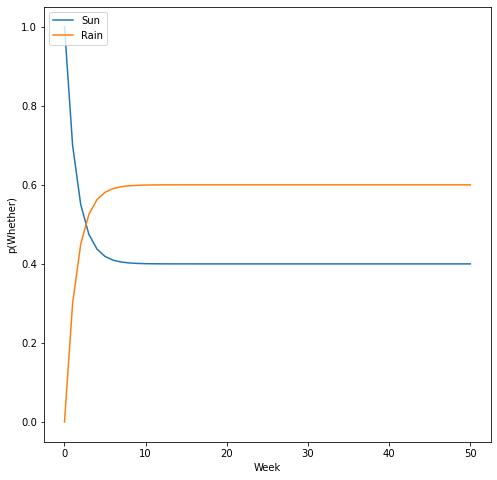

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.xlabel('Week')
plt.ylabel('p(Whether)')
plt.plot(np.array(x_t)[:,0], label='Sun')
plt.plot(np.array(x_t)[:,1], label='Rain')
plt.legend(loc='upper left')